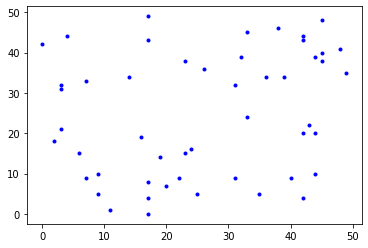

0 Группа [[7, 9], [40, 9], [0, 42], [17, 43], [42, 20], [23, 38], [43, 22], [32, 39], [19, 14], [3, 32], [17, 0], [26, 36], [36, 34], [6, 15], [44, 20], [31, 32], [9, 5], [3, 31], [17, 4], [4, 44], [24, 16], [42, 4], [17, 8], [33, 24], [20, 7], [25, 5], [39, 34], [14, 34], [3, 21], [31, 9], [23, 15], [7, 33], [2, 18], [11, 1], [35, 5], [16, 19], [44, 10], [9, 10], [22, 9]]
1 Группа [[49, 35]]
2 Группа [[45, 40], [48, 41], [44, 39], [45, 38]]
3 Группа [[42, 44], [17, 49], [33, 45], [42, 43], [38, 46], [45, 48]]
************************ итерация 1 ****************************
0 Группа [[7, 9], [40, 9], [0, 42], [19, 14], [3, 32], [17, 0], [6, 15], [9, 5], [3, 31], [17, 4], [4, 44], [24, 16], [42, 4], [17, 8], [33, 24], [20, 7], [25, 5], [14, 34], [3, 21], [31, 9], [23, 15], [7, 33], [2, 18], [11, 1], [35, 5], [16, 19], [44, 10], [9, 10], [22, 9]]
1 Группа [[42, 20], [43, 22], [44, 20], [49, 35]]
2 Группа [[45, 40], [48, 41], [42, 44], [36, 34], [42, 43], [44, 39], [45, 38], [45, 48], [39

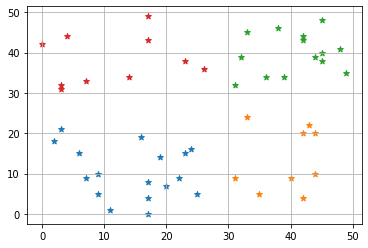

In [15]:
import numpy as np
import matplotlib.pyplot as plt

flag = 0

def ecludDist(x, y):
    return np.sqrt(sum(np.square(np.array(x) - np.array(y))))


def clusterMean(dataset):
    return sum(np.array(dataset)) / len(dataset)

def randCenter(dataset, k):
    temp = []
    while len(temp) < k:
        index = np.random.randint(0, len(dataset)-1)
        if  index not in temp:
            temp.append(index)
    return np.array([dataset[i] for i in temp])


def kMeans(dataset, dist, center, k):
    global flag
    #all_kinds используется для хранения промежуточных результатов расчета
    all_kinds = []
    for _ in range(k):
        temp = []
        all_kinds.append(temp)
    # Рассчитать расстояние от каждой точки до каждой средней точки  
    for i in dataset:
        temp = []
        for j in center:
            temp.append(dist(i, j))
        all_kinds[temp.index(min(temp))].append(i)
    # Печать промежуточных результатов    
    for i in range(k):
        print(str(i)+" Группа", all_kinds[i], end='\n')
    flag += 1
    print("************************ итерация "+str(flag)+' ****************************')
    # Обновление средней точки
    center_ = np.array([clusterMean(i) for i in all_kinds])
    if (center_ == center).all():
        print('Конец')
        for i in range(k):
            print("Средняя точка группы "+str(i), center_[i], end='\n')
            plt.scatter([j[0] for j in all_kinds[i]], [j[1] for j in all_kinds[i]], marker='*')
        plt.grid()
        plt.show()
    else:
        # Рекурсивно вызывать функцию kMeans
        center = center_
        kMeans(dataset, dist, center, k)

def main(k):
    '' 'Генерация случайных точек' '' 
    x = [np.random.randint(0, 50) for _ in range(50)]
    y = [np.random.randint(0, 50) for _ in range(50)]
    points = [[i,j] for i, j in zip(x, y)]
    plt.plot(x, y, 'b.')
    plt.show()
    initial_center = randCenter(dataset=points, k=k)
    kMeans(dataset=points, dist=ecludDist, center=initial_center, k=k)

if __name__ == '__main__':
    main(4) 